In [ ]:
!git clone https://github.com/Seung-hwanSong/LG2024_ANN.git #코랩 사용

# [Clustering]
# K-Means Clustering / Hierachical Clustering / Density-based Clustering
## [Hierachical Clustering]

##### jupyter notebook 단축키

- ctrl+enter: 셀 실행   
- shift+enter: 셀 실행 및 다음 셀 이동   
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- 함수 ( ) 안에서 shift+tab: arguments description. shift+tab+tab은 길게 볼 수 있도록

## 1. 모듈 불러오기

In [1]:
''' 기본 모듈 및 시각화 모듈 '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

''' 데이터 전처리 모듈 '''
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA

''' Clustering 모듈 '''
import scipy.cluster.hierarchy as shc
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.vq import whiten # feature 별 정규화
from scipy.cluster.hierarchy import linkage, fcluster

## 2. 분석데이터: Wholesale customers data

In [2]:
data = pd.read_csv('/content/LG2024_Clustering/data/Wholesale customers data.csv')
# data = pd.read_csv('./data/Wholesale customers data.csv') # 로컬

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### pairplots 확인 

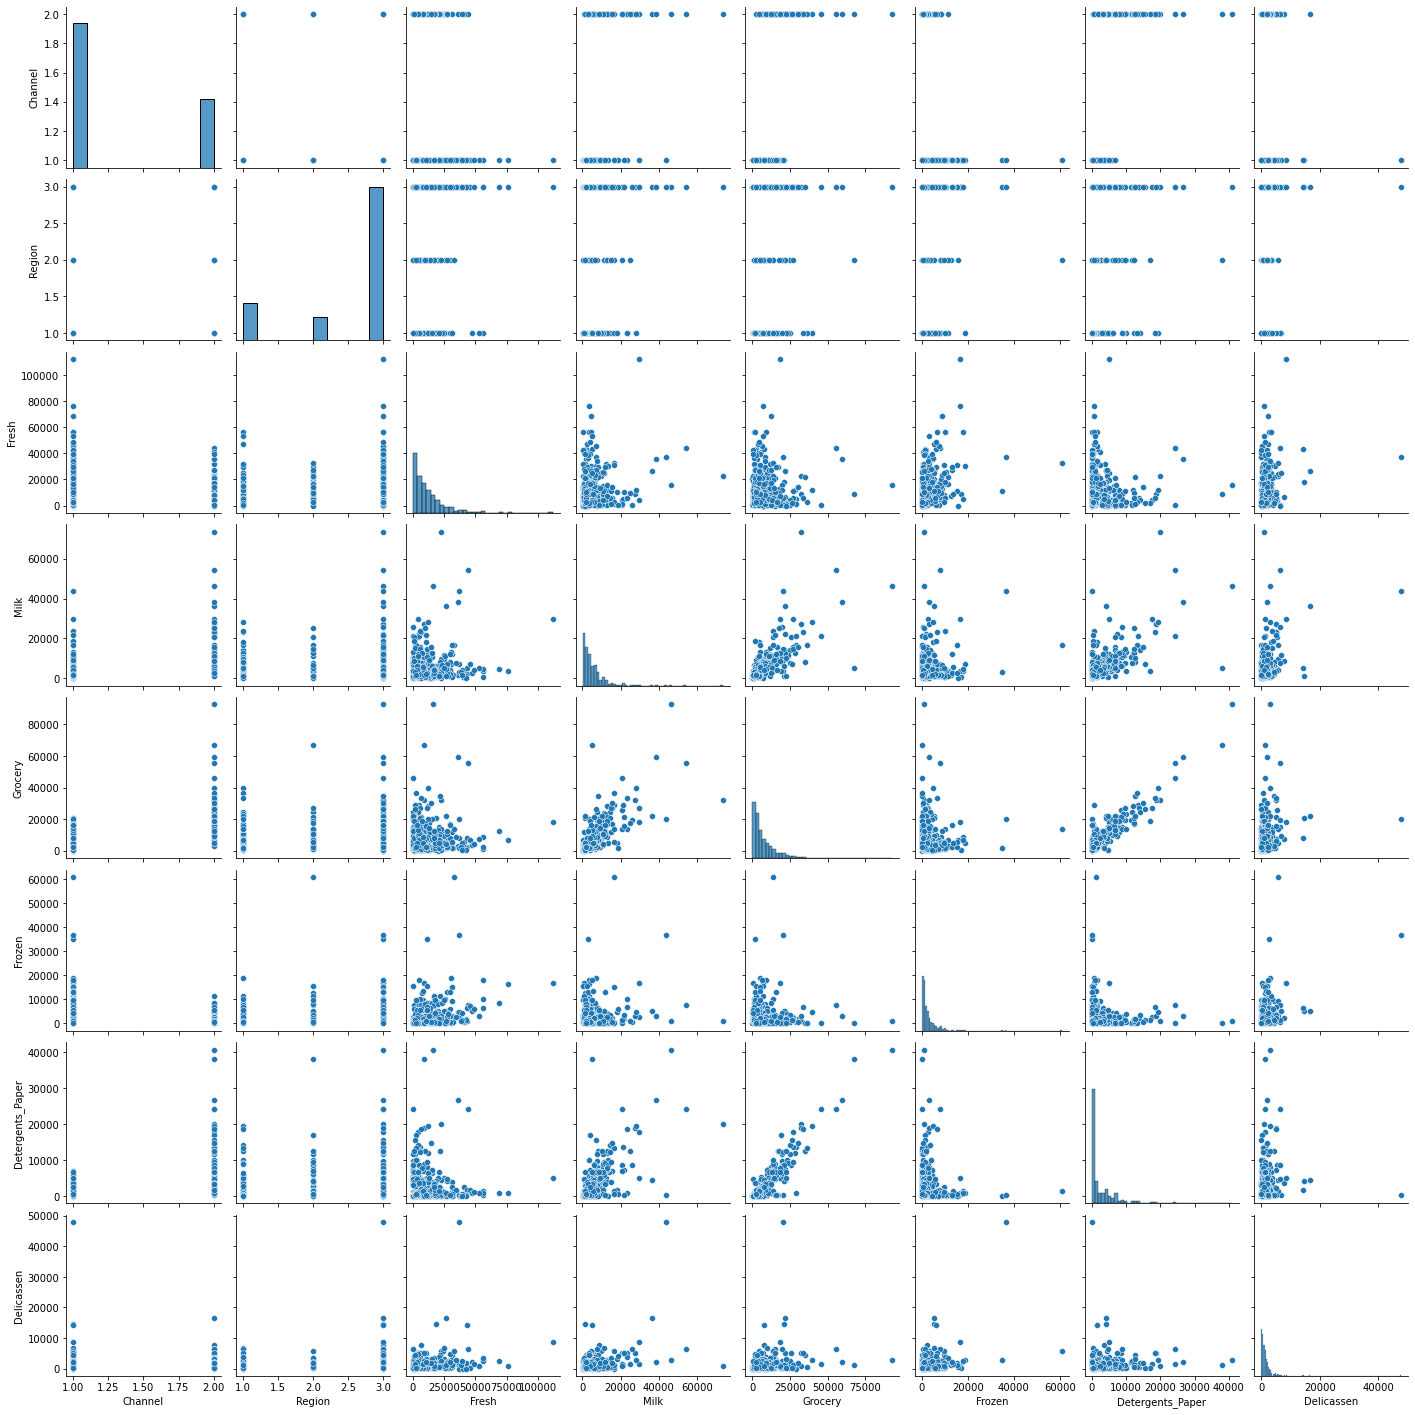

In [3]:
sns.pairplot(data)

### 정규화 (Normalization)

In [4]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


## 3. Hierachical Clustering (Simple Agglomerative)

### - x-axis: Sample
### - y-axis: Sample 사이의 거리

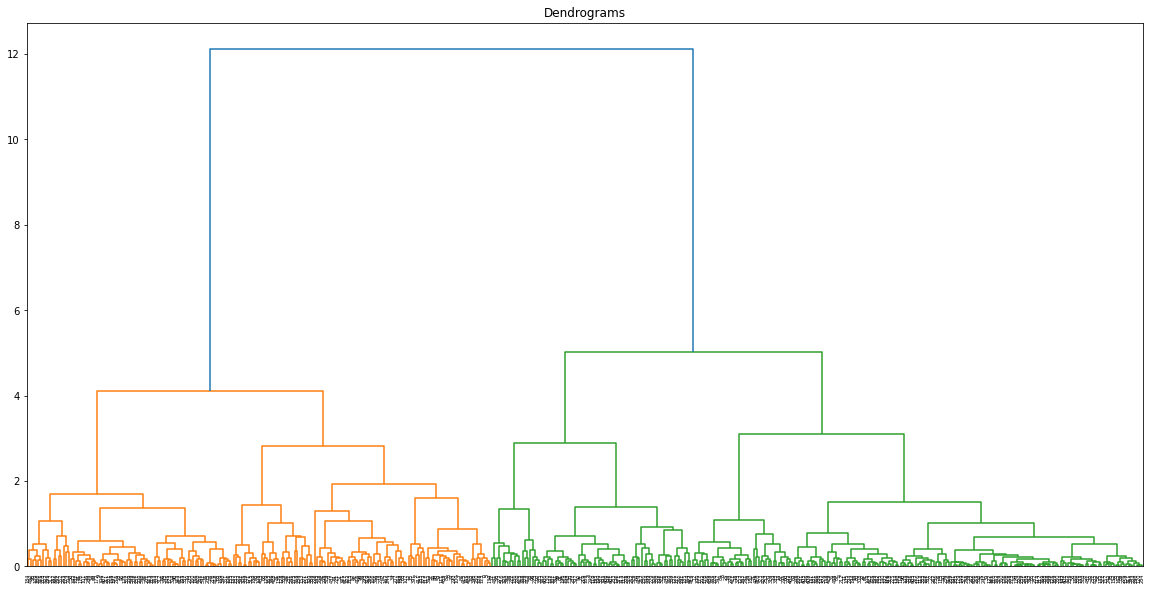

In [5]:
plt.figure(figsize=(20, 10))  

# Ward method는 noise에 덜 민감하며, 비슷한 크기의 군집끼리 묶어주는 경향이 존재
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

plt.title("Dendrograms")  
plt.show()

### * maximum distance인 파란색 선을 기준으로 Threshold를 6으로 설정

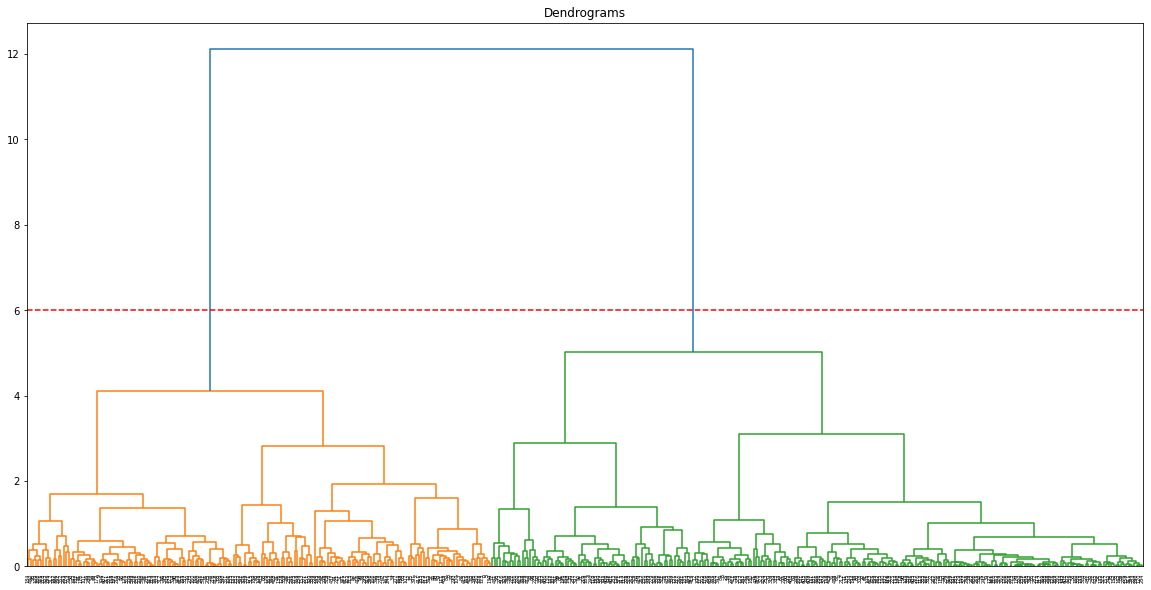

In [6]:
# set a threshold

plt.figure(figsize=(20, 10))  

dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.title("Dendrograms")  
plt.show()

## 4. Distance Matrix & Type of Methods

In [7]:
comic_con = pd.read_csv('/content/LG2024_Clustering/data/comic_con.csv')
# comic_con = pd.read_csv('./data/comic_con.csv') # 로컬

comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


### whitening function (feature 별 정규화)

In [8]:
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


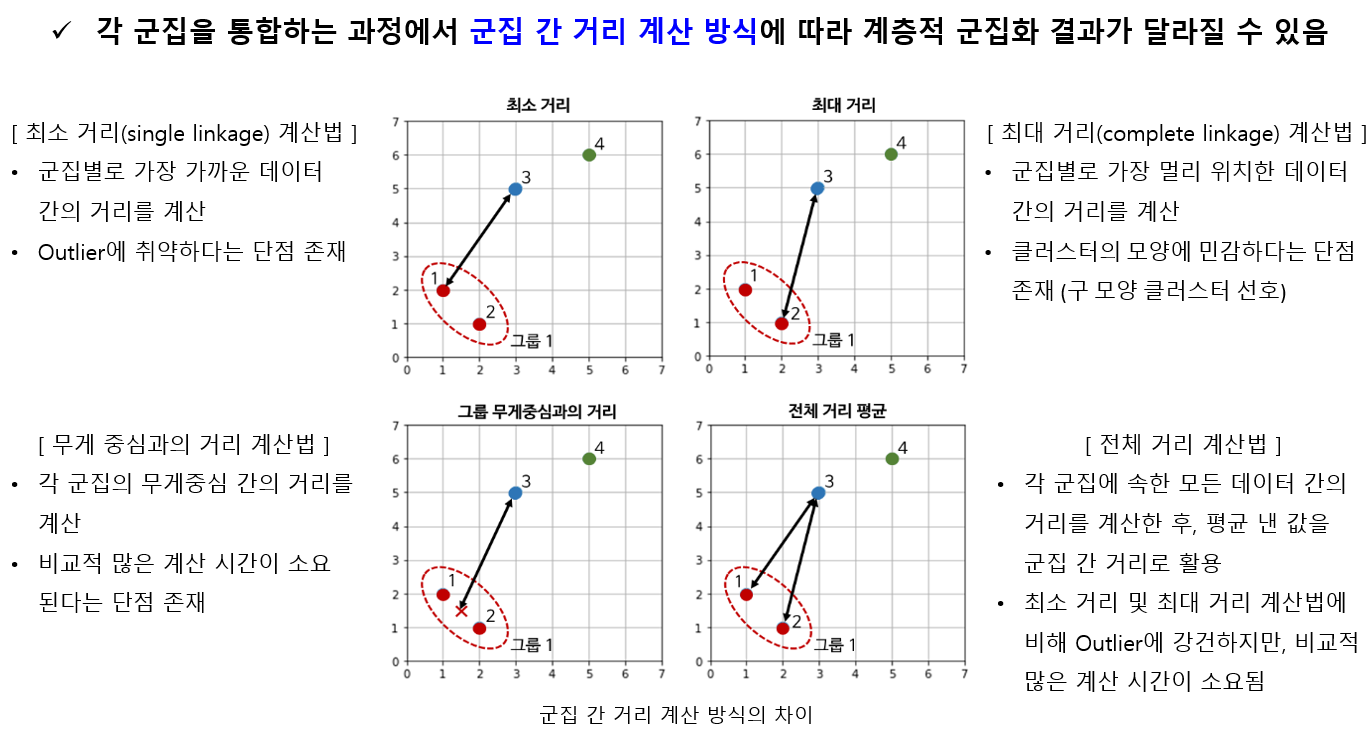

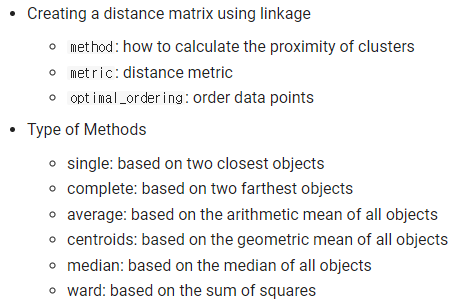

### 4.1 Hierarchical Clustering with Ward Method

<AxesSubplot:xlabel='x_scaled', ylabel='y_scaled'>

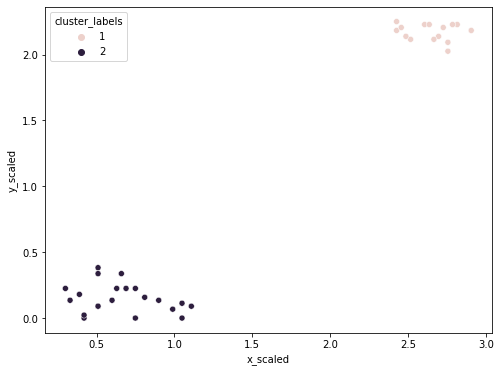

In [9]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)

### 4.2 Hierarchical Clustering with Single Method

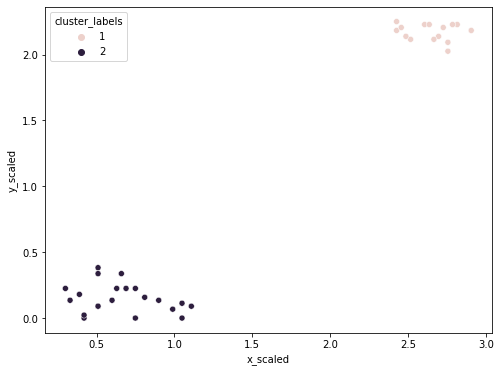

In [10]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='single', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

### 4.3 Hierarchical Clustering with Complete Method

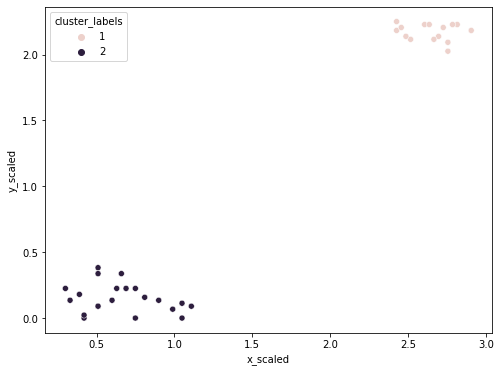

In [11]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

## 5. Thresholding in Hierarchical Clustering

In [12]:
df = pd.read_csv('/content/LG2024_Clustering/data/cc_general.csv')
# df = pd.read_csv('./data/cc_general.csv') # 로컬

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Preprocessing

In [13]:
# Drop the customer id column
df = df.drop('CUST_ID', axis = 1)

# Fill the missing values with ffill method
df.fillna(method ='ffill', inplace = True)

# Scale the data and normalize
sc = StandardScaler()
df_scaled = sc.fit_transform(df)
df_normalized = normalize(df_scaled)

### 데이터의 차원을 3차원으로 축소

In [14]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2', 'P3']

df_pca.head()

,P1,P2,P3
0,-0.489949,-0.679976,-0.096113
1,-0.519099,0.544827,0.195173
2,0.330633,0.268881,0.120075
3,-0.481656,-0.097611,0.456931
4,-0.563512,-0.482505,-0.253768


### Hierarchical Clustering with Ward Method

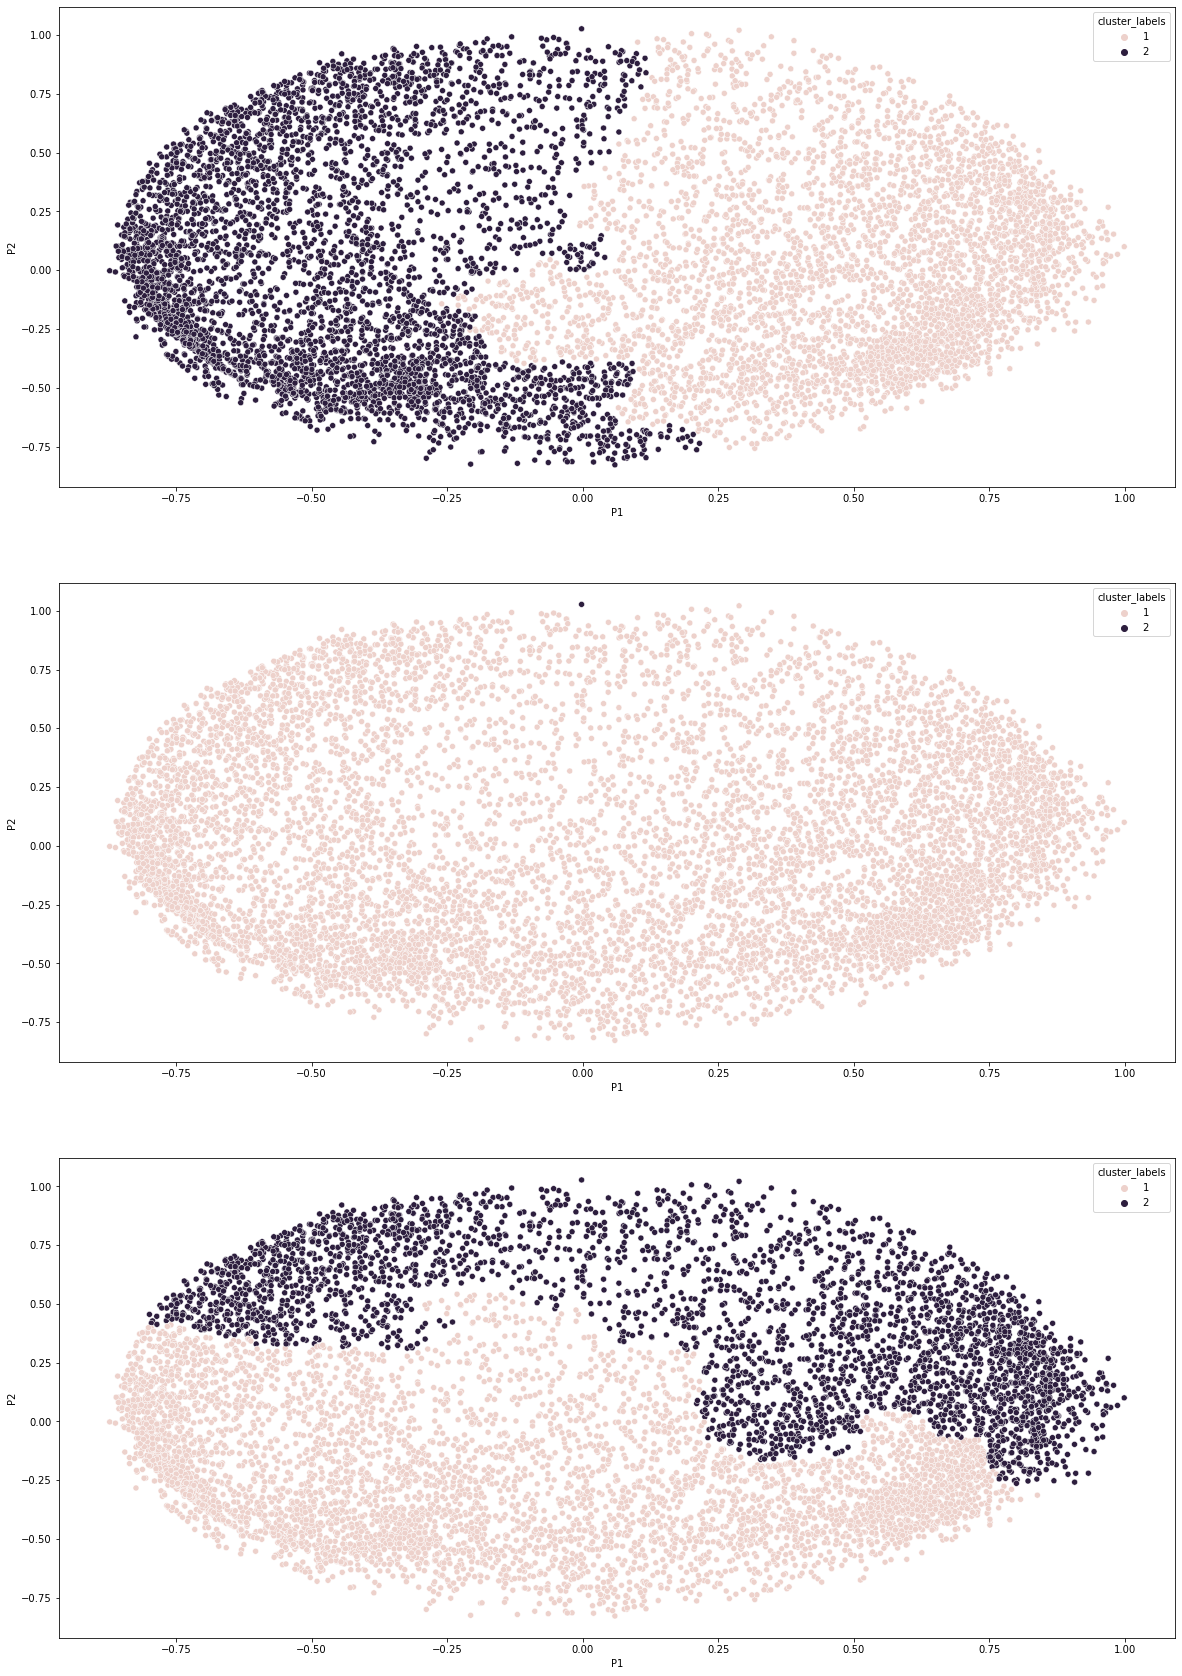

In [15]:
plt.figure(figsize=(20, 30))  

# 첫 번째 플롯
plt.subplot(311)  # 3행 1열의 첫 번째 위치
distance_matrix = linkage(df_pca[['P1', 'P2']], method='ward', metric='euclidean')
df_pca['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='P1', y='P2', hue='cluster_labels', data=df_pca)

# 두 번째 플롯
plt.subplot(312)  # 3행 1열의 두 번째 위치
distance_matrix = linkage(df_pca[['P1', 'P2']], method='single', metric='euclidean')
df_pca['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='P1', y='P2', hue='cluster_labels', data=df_pca)


# 두 번째 플롯
plt.subplot(313)  # 3행 3열의 세 번째 위치
distance_matrix = linkage(df_pca[['P1', 'P2']], method='complete', metric='euclidean')
df_pca['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='P1', y='P2', hue='cluster_labels', data=df_pca)

plt.show()

### Create the Dendogram plot

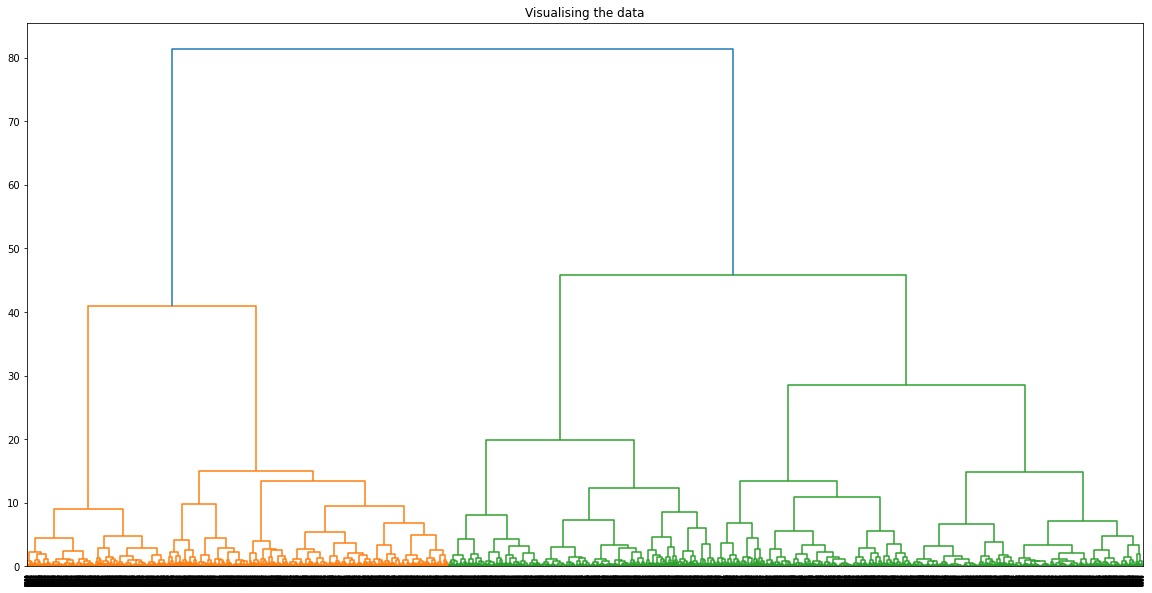

In [16]:
plt.figure(figsize=(20, 10))  

dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='ward')))
plt.title('Visualising the data')
plt.show()

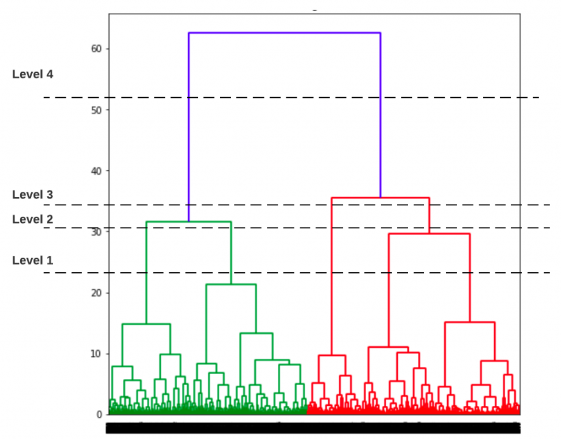

### 5.1 Create the clusters using Agglomerative hierarchical clustering (5 clusters)

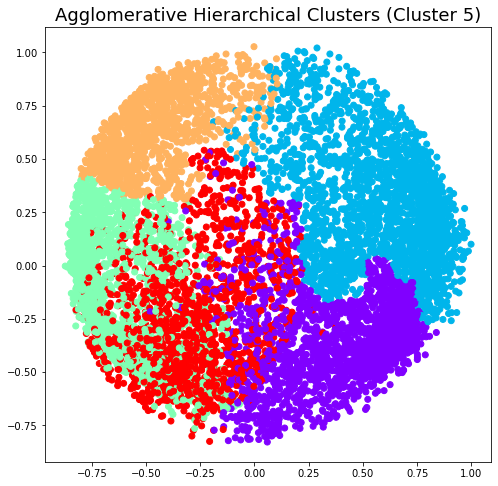

In [17]:
agc = AgglomerativeClustering(n_clusters = 5)

plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters (Cluster 5)", fontsize=18)
plt.show()

### 5.2 Create the clusters using Agglomerative hierarchical clustering (4 clusters)

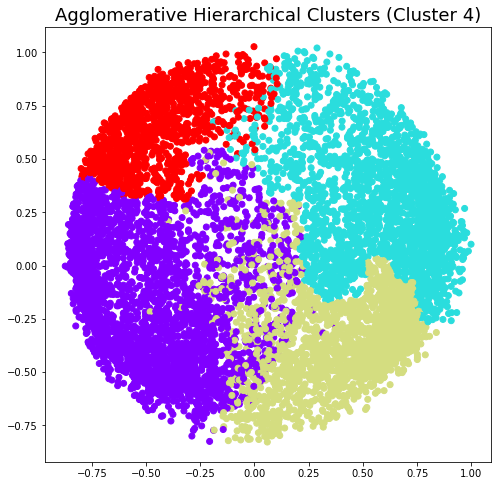

In [18]:
agc = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters (Cluster 4)", fontsize=18)
plt.show()

### 5.3 Create the clusters using Agglomerative hierarchical clustering (3 clusters)

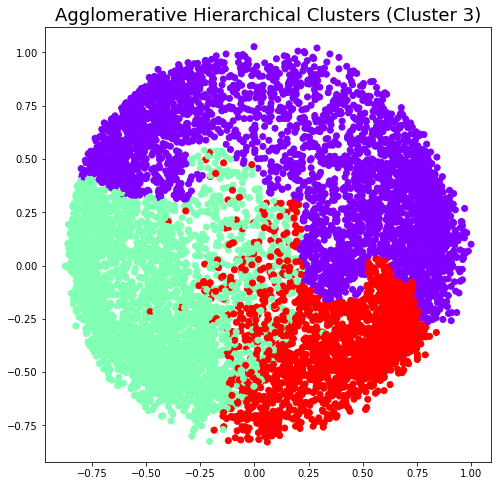

In [19]:
agc = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters (Cluster 3)", fontsize=18)
plt.show()

### 5.4 Create the clusters using Agglomerative hierarchical clustering (2 clusters)

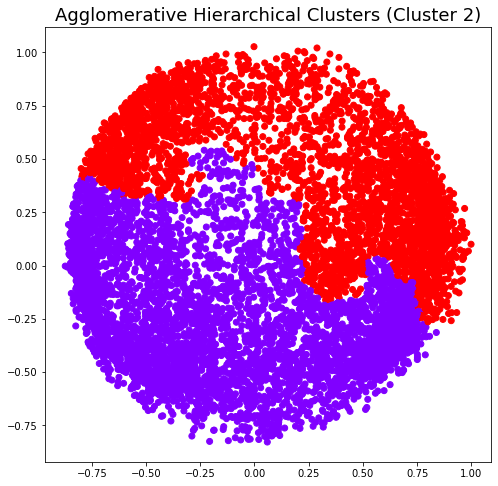

In [20]:
agc = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters (Cluster 2)", fontsize=18)
plt.show()

# EOD